In [1]:
from astropy.io import fits
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
file_names = glob('/home/sarik/ccdlab/bias_frames/*.fits')
images = []
for i in range(len(file_names)):
    images.append(fits.getdata(file_names[i]))

In [3]:
im_array = np.array(images)

In [4]:
im_array.shape

(5, 2532, 3352)

In [5]:
im0 = im_array[1,:,:]
std = np.std(im0[:100,:100])
print(std)

30.44742427135668


In [15]:
b1 = np.mean(1.0*im_array, axis=0)
b2 = np.mean((1.0*im_array)**2, axis=0)

In [18]:
sd = np.sqrt((b2 - b1*b1))
np.where(np.isnan(im_array**2))

(array([], dtype=int64), array([], dtype=int64), array([], dtype=int64))

In [19]:
print(np.median(sd[:100, :100]))

23.919866220359932


In [20]:
print(np.mean(sd[:100, :100]))

24.50286301844587


In [22]:
twenty_five_dir = glob('/home/sarik/ccdlab/twentyfive_sec/*.fits')
five_sec_dir = glob('/home/sarik/ccdlab/five_sec/*.fits')
onetwentyfive = fits.getdata('/home/sarik/ccdlab/onetwentyfive/rho.2020-09-17T18:01:44.948.0012.fits')

five_sec, twenty_five = [], [],
for i in range(3):
    five_sec.append(fits.getdata(five_sec_dir[i]))
    twenty_five.append(fits.getdata(twenty_five_dir[i]))


In [23]:
median_5s = np.median(five_sec, axis=0)
median_25s = np.median(twenty_five, axis=0)

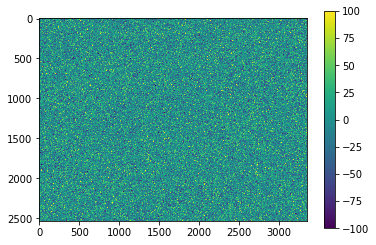

In [29]:
diff = median_25s - median_5s
plt.imshow(diff, vmin=-100, vmax=100)
plt.colorbar()

In [28]:
print(np.max(diff), np.min(diff), np.median(diff))

48109.0 -223.0 1.0


In [30]:
print(np.mean(diff), np.std(diff))

1.6229191173975501 68.62894815526775


In [31]:
print(np.std(diff)/len(diff.ravel())**.5)

0.023557190125324156


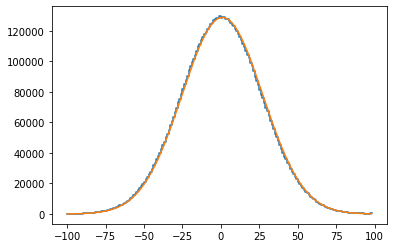

In [38]:
counts, bins = np.histogram(diff.ravel(), bins=np.arange(-100, 100, 1))
from scipy.optimize import curve_fit
def gauss(x, a, mu, sigma):
          return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)


(-0.05, 0.05)

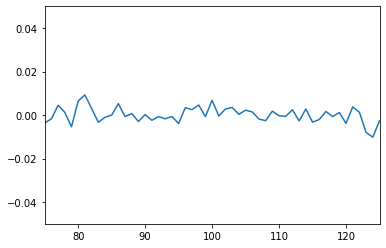

In [44]:
plt.plot((counts-fit) / fit)
plt.xlim(75, 125)
plt.ylim(-.05, .05)

In [46]:
print(popt)

[ 1.28678589e+05  9.91622538e-01 -2.62573229e+01]


In [47]:
np.sum(counts)

8477859

In [48]:
len(diff.ravel())

8487264

In [50]:
abs(popt[2])/np.sqrt(sum(counts))

0.009017940175346937

In [58]:
diff2 = (1.0*np.array(twenty_five) - 1.0*np.array(five_sec))




In [59]:
diff2.shape

(3, 2532, 3352)

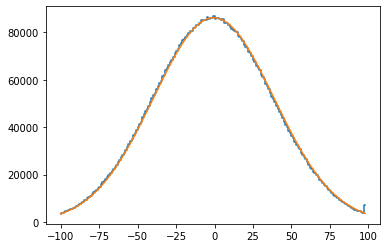

In [63]:
counts, bins = np.histogram(diff2[0].ravel(), bins=np.arange(-100, 100, 1))

def gauss(x, a, mu, sigma):
          return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)



In [67]:
mu, sigma = popt[1], popt[2]
print(mu, sigma, sigma/np.sqrt(sum(counts)))

-0.5541250013139577 -39.252970706027284 -0.013554765849006702


3.4880051451200917 -39.286642102867916 -0.013570333251071086


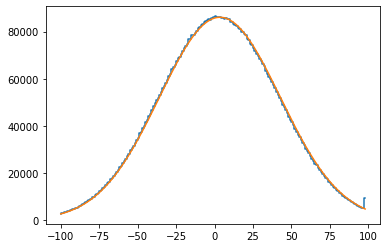

In [71]:
counts, bins = np.histogram(diff2[1].ravel(), bins=np.arange(-100, 100, 1))

def gauss(x, a, mu, sigma):
          return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)

mu2, sigma2 = popt[1], popt[2]
print(mu2, sigma2, sigma2/np.sqrt(sum(counts)))

0.09306215443125601 -39.29855313966756 -0.01357089791761609


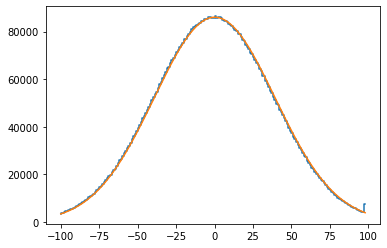

In [72]:
counts, bins = np.histogram(diff2[2].ravel(), bins=np.arange(-100, 100, 1))

def gauss(x, a, mu, sigma):
          return a*np.exp(-.5*(x-mu)**2/(sigma**2))

popt, pcov = curve_fit(gauss, xdata=bins[:-1], ydata=counts, p0=[1,1,1])
fit = gauss(bins[:-1], *popt)

plt.step(bins[:-1], counts)
plt.plot(bins[:-1], fit)

mu3, sigma3 = popt[1], popt[2]
print(mu3, sigma3, sigma3/np.sqrt(sum(counts)))

In [73]:
print(np.mean([mu, mu2, mu3]))
print(np.std([mu, mu2, mu3]))


2.3563574815571466
1.6003914736385427
